# Definitions

The structure and properties of the class hierarchy of the ``finite_algebra`` module are based on the following definitions.

## Groups, Rings, Fields, etc.

The following list of algebraic structures is ordered such that each successive structure builds on the previous one.  The class hierarchy of the ``finite_algebra`` module modeled on this progression.

* **Magma** -- a set with a binary operation:  $\langle S, \circ \rangle$, where $S$ is a set and $\circ: S \times S \to S$

* **Semigroup** -- an associative Magma:  for any $a,b,c \in S \Rightarrow a \circ (b \circ c) = (a \circ b) \circ c$

* **Monoid** -- a Semigroup with identity element:  $\exists e \in S$, such that, for all $a \in S, a \circ e = e \circ a = a$

* **Group** -- a Monoid with inverse elements:  $\forall a \in S, \exists a^{-1} \in S$, such that, $a \circ a^{-1} = a^{-1} 
\circ a = e$

* **Ring** -- $\langle S, +, \times \rangle$, where $\langle S, + \rangle$ is a commutative Group, $\langle S, \times \rangle$ is a Semigroup, and $\times$ distributes over $+$

* **Field** -- a Ring $\langle S, +, \times \rangle$, where $\langle S\setminus{\{0\}}, \times \rangle$ is a commutative Group

## Vector Spaces and Modules

In the definitions, below, care is taken to not conflate the scalar-scalar, vector-vector, and scalar-vector operations.

A **Vector Space**, $\mathscr{V} = \langle \mathscr{G}, \mathscr{F}, \circ \rangle$, consists of the following:

* an **abelian Group**, $\mathscr{G} = \langle V, \oplus \rangle$ (i.e., the *"vectors"*)
* a **field**, $\mathscr{F} = \langle S, +, \times \rangle$ (i.e., the *"scalars"*)
* and a **binary operator**, $\circ : S \times V \to V$

where the following conditions hold:

1. Scaled Vectors: For all $s \in S$ and $v \in V \Rightarrow s \circ v \in V$
1. Scaling by One: If $\underline{1} \in S$ is the multiplicative identity element of $\mathscr{F}$, then $\underline{1} \circ v = v$
1. Distributivity of Scalars Over Vector Addition: $s \circ (v_1 \oplus v_2) = (s \circ v_1) \oplus (s \circ v_2)$
1. Distributivity of Vectors Over Scalar Addition: $(s_1 + s_2) \circ v = (s_1 \circ v) \oplus (s_2 \circ v)$
1. Associativity: $s_1 \circ (s_2 \circ v) = (s_1 \times s_2) \circ v$

A **Module**, $\mathscr{M} = \langle \mathscr{G}, \mathscr{R}, \circ \rangle$, has the same conditions as a Vector Space, except that the Field is replaced by a **Ring**, $\mathscr{R} = \langle S, +, \times \rangle$.

## Class Hierarchy

The definitions, above, are supported by the following class hierarchy, used in the ``finite_algebras`` module:

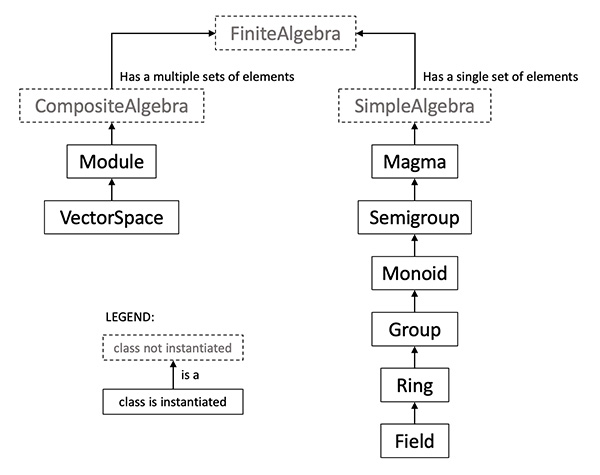